In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [69]:
df=pd.read_csv("data/michelin_my_maps.csv",sep=None)
df.head()


,Name,Address,Location,Price,Cuisine,Longitude,Latitude,PhoneNumber,Url,WebsiteUrl,Award,GreenStar,FacilitiesAndServices,Description
0,ES:SENZ,"Mietenkamer Straße 65, Grassau, 83224, Germany","Grassau, Germany",€€€€,"Creative, Modern Cuisine",12.465618,47.785630,4.986414e+11,https://guide.michelin.com/en/bayern/grassau/r...,https://www.das-achental.com/,3 Stars,0,"Air conditioning,Car park,Interesting wine list","From the get-go, the stage is set in grand sty..."
1,Tohru in der Schreiberei,"Burgstraße 5, Munich, 80331, Germany","Munich, Germany",€€€€,"Modern Cuisine, Japanese Contemporary",11.577475,48.137597,4.989215e+11,https://guide.michelin.com/en/bayern/mnchen/re...,https://schreiberei-muc.de/,3 Stars,0,"Interesting wine list,Notable sake list",It is absolutely worth climbing the 23 steps o...
2,Schwarzwaldstube,"Tonbachstraße 237, Baiersbronn, 72270, Germany","Baiersbronn, Germany",€€€€,"Classic French, Creative",8.358280,48.536911,4.974425e+11,https://guide.michelin.com/en/baden-wurttember...,https://www.traube-tonbach.de/restaurants-bar/...,3 Stars,0,"Air conditioning,Car park,Great view,Interesti...","Schwarzwaldstube, the flagship restaurant of t..."
3,Victor's Fine Dining by christian bau,"Schlossstraße 27, Perl, 66706, Germany","Perl, Germany",€€€€,"Creative, Contemporary",6.387211,49.535173,4.968668e+10,https://guide.michelin.com/en/saarland/perl/re...,https://www.victors-fine-dining.de/,3 Stars,0,"Air conditioning,Car park,Interesting wine lis...",The way in which Christian Bau combines influe...
4,Aqua,"Parkstraße 1, Wolfsburg, 38440, Germany","Wolfsburg, Germany",€€€€,"Creative, Modern Cuisine",10.789979,52.432849,4.953616e+11,https://guide.michelin.com/en/niedersachsen/wo...,https://www.restaurant-aqua.com,3 Stars,0,"Air conditioning,Car park,Interesting wine lis...",The Ritz-Carlton is located in the heart of Vo...


In [70]:
df.shape

(18667, 14)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18667 entries, 0 to 18666
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   18667 non-null  object 
 1   Address                18667 non-null  object 
 2   Location               18667 non-null  object 
 3   Price                  18667 non-null  object 
 4   Cuisine                18667 non-null  object 
 5   Longitude              18667 non-null  float64
 6   Latitude               18667 non-null  float64
 7   PhoneNumber            18245 non-null  float64
 8   Url                    18667 non-null  object 
 9   WebsiteUrl             16017 non-null  object 
 10  Award                  18667 non-null  object 
 11  GreenStar              18667 non-null  int64  
 12  FacilitiesAndServices  17664 non-null  object 
 13  Description            18667 non-null  object 
dtypes: float64(3), int64(1), object(10)
memory usage: 2.0+

In [72]:
df.dtypes

Name                      object
Address                   object
Location                  object
Price                     object
Cuisine                   object
Longitude                float64
Latitude                 float64
PhoneNumber              float64
Url                       object
WebsiteUrl                object
Award                     object
GreenStar                  int64
FacilitiesAndServices     object
Description               object
dtype: object

In [73]:
df.describe()

,Longitude,Latitude,PhoneNumber,GreenStar
count,18667.000000,18667.000000,1.824500e+04,18667.000000
mean,17.384507,39.900812,5.952578e+11,0.035785
std,62.788501,13.728863,9.095724e+12,0.185759
min,-123.719064,-34.626786,3.522369e+07,0.000000
25%,-0.663389,35.654546,3.314494e+10,0.000000
50%,6.917324,43.694356,3.902998e+10,0.000000
75%,17.665124,48.822096,3.905420e+11,0.000000
max,139.819549,64.152460,9.718004e+14,1.000000


In [74]:
df.duplicated().any()

False

In [77]:
df.isnull().sum()

Name                        0
Address                     0
Location                    0
Price                       0
Cuisine                     0
Longitude                   0
Latitude                    0
PhoneNumber               422
Url                         0
WebsiteUrl               2650
Award                       0
GreenStar                   0
FacilitiesAndServices    1003
Description                 0
dtype: int64

In [75]:
cat_cols=df.select_dtypes(include="object").columns

for col in cat_cols:
    if df[col].nunique()<10:
        print(col,"-",df[col].nunique(),"-",df[col].unique())
    else:
        print(col,"-",df[col].nunique())

Name - 17982
Address - 18217
Location - 5892
Price - 36
Cuisine - 1771
Url - 18667
WebsiteUrl - 15838
Award - 5 - ['3 Stars' 'Selected Restaurants' '1 Star' '2 Stars' 'Bib Gourmand']
FacilitiesAndServices - 882
Description - 18666


In [76]:
num_cols=df.select_dtypes(include="number").columns

for col in num_cols:
    if df[col].nunique()<10:
        print(col,"-",df[col].nunique(),"-",df[col].unique())
    else:
        print(col,"-",df[col].nunique())

Longitude - 18603
Latitude - 18604
PhoneNumber - 17878
GreenStar - 2 - [0 1]


In [78]:
df.drop(columns=["PhoneNumber","Url","WebsiteUrl","FacilitiesAndServices","Description"],inplace=True)

In [79]:
df_name=df["Name"].nunique()
df_name

17982

In [80]:
df_location=df["Location"].value_counts()
df_location.head(10)

Tokyo, Japan                      525
Paris, France                     458
London, United Kingdom            359
Singapore                         291
New York, NY, USA                 254
Kyoto, Japan                      246
Osaka, Japan                      240
Hong Kong, Hong Kong SAR China    212
Seoul, South Korea                194
Bangkok, Thailand                 180
Name: Location, dtype: int64

In [81]:
df_price=df["Price"].value_counts()
df_price

€€      4732
€€€     3501
€€€€    2179
$$      1373
$$$     1023
$$$$     942
¥¥¥      784
$        579
¥¥       475
££       431
€        426
£££      393
££££     263
¥¥¥¥     255
¥        245
฿฿       209
฿        128
₩         97
₫         83
฿฿฿       72
₩₩        62
฿฿฿฿      59
₫₫        55
₩₩₩₩      47
₺₺        47
₺₺₺       43
₩₩₩       39
₫₫₫       26
₺₺₺₺      24
₫₫₫₫      17
﷼﷼﷼       14
£         14
₺         12
﷼﷼﷼﷼       8
﷼﷼         7
﷼          3
Name: Price, dtype: int64

In [82]:
df_cuisine=df["Cuisine"].value_counts()
df_cuisine.head(10)

Modern Cuisine         2779
Traditional Cuisine     705
Creative                572
Japanese                562
Contemporary            531
Italian                 428
French                  387
Seafood                 339
Modern British          304
Street Food             270
Name: Cuisine, dtype: int64

In [83]:
df_award=df["Award"].value_counts()
df_award

Selected Restaurants    11405
Bib Gourmand             3476
1 Star                   3105
2 Stars                   524
3 Stars                   157
Name: Award, dtype: int64

In [84]:
df_greenstar=df["GreenStar"].value_counts()
df_greenstar

0    17999
1      668
Name: GreenStar, dtype: int64

In [85]:
df["City"]=df["Location"].str.replace(",","").str.split().str[0]
df["Country"]=df["Location"].str.replace(",","").str.split().str[1]


In [86]:
df["GreenStar"] = df["GreenStar"].replace({0: "No", 1: "Yes"})

In [87]:
df["Price_dollar"] = df["Price"].astype(str).str.len().apply(lambda x: "$" * x)

In [88]:
columns=["Name","Address","City","Country","Price_dollar","Cuisine","Award","GreenStar"]
df=df[columns]

In [101]:
df.head()

,Name,Address,City,Country,Price_dollar,Cuisine,Award,GreenStar
0,ES:SENZ,"Mietenkamer Straße 65, Grassau, 83224, Germany",Grassau,Germany,$$$$,"Creative, Modern Cuisine",3 Stars,No
1,Tohru in der Schreiberei,"Burgstraße 5, Munich, 80331, Germany",Munich,Germany,$$$$,"Modern Cuisine, Japanese Contemporary",3 Stars,No
2,Schwarzwaldstube,"Tonbachstraße 237, Baiersbronn, 72270, Germany",Baiersbronn,Germany,$$$$,"Classic French, Creative",3 Stars,No
3,Victor's Fine Dining by christian bau,"Schlossstraße 27, Perl, 66706, Germany",Perl,Germany,$$$$,"Creative, Contemporary",3 Stars,No
4,Aqua,"Parkstraße 1, Wolfsburg, 38440, Germany",Wolfsburg,Germany,$$$$,"Creative, Modern Cuisine",3 Stars,No


In [90]:
df_award=df["Award"].value_counts()
df_award

Selected Restaurants    11405
Bib Gourmand             3476
1 Star                   3105
2 Stars                   524
3 Stars                   157
Name: Award, dtype: int64

In [91]:
df_greenstar=df["GreenStar"].value_counts()
df_greenstar

No     17999
Yes      668
Name: GreenStar, dtype: int64

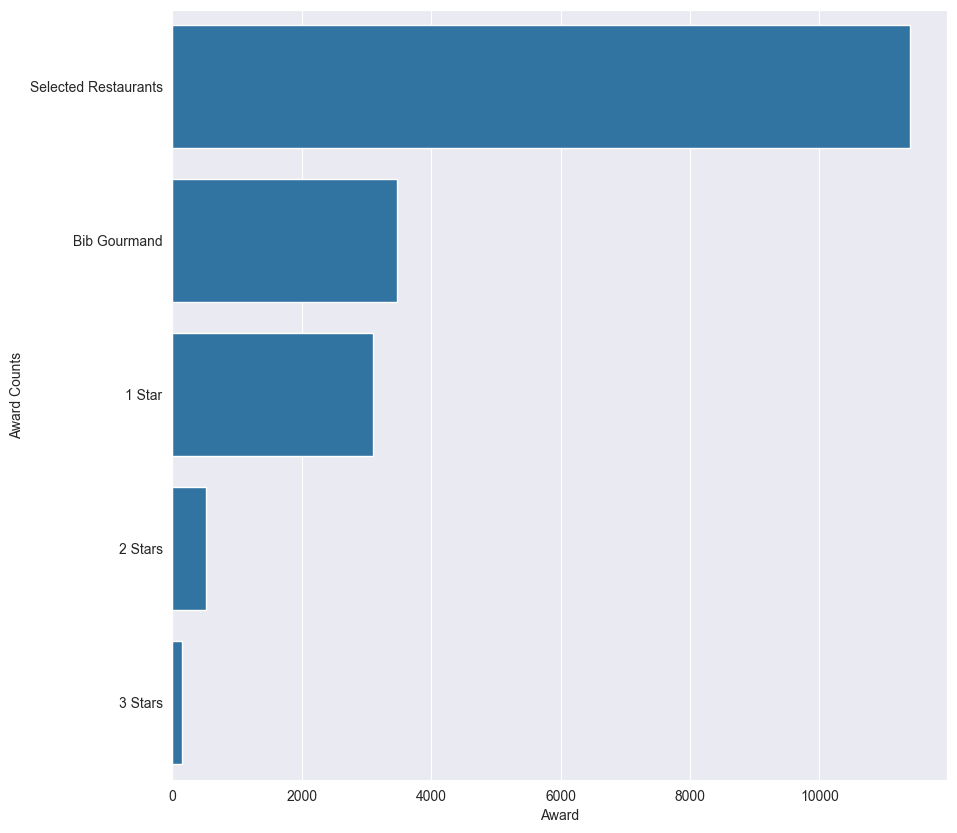

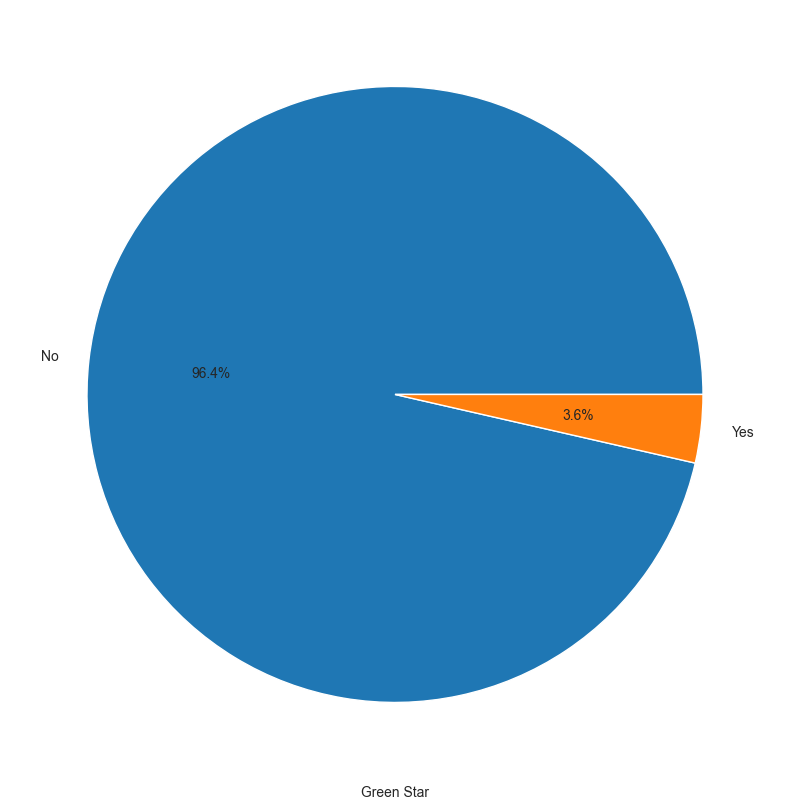

In [92]:
plt.figure(figsize=(10,10))
sns.barplot(x=df_award.values,y=df_award.index)
plt.xlabel("Award")
plt.ylabel("Award Counts")
plt.show()

plt.figure(figsize=(10,10))
plt.pie(df_greenstar.values,labels=df_greenstar.index,autopct="%1.1f%%")
plt.xlabel("Green Star")
plt.show()

In [93]:
df_city=df["City"].value_counts().head(10)
df_city


Tokyo        525
Paris        458
London       359
New          325
Singapore    291
San          255
Kyoto        246
Osaka        240
Hong         212
Seoul        194
Name: City, dtype: int64

In [94]:
df_country=df["Country"].value_counts().head(10)
df_country

France         2843
Italy          1481
Japan          1091
Germany        1063
Spain           996
United          923
Belgium         723
China           668
Switzerland     483
Netherlands     462
Name: Country, dtype: int64

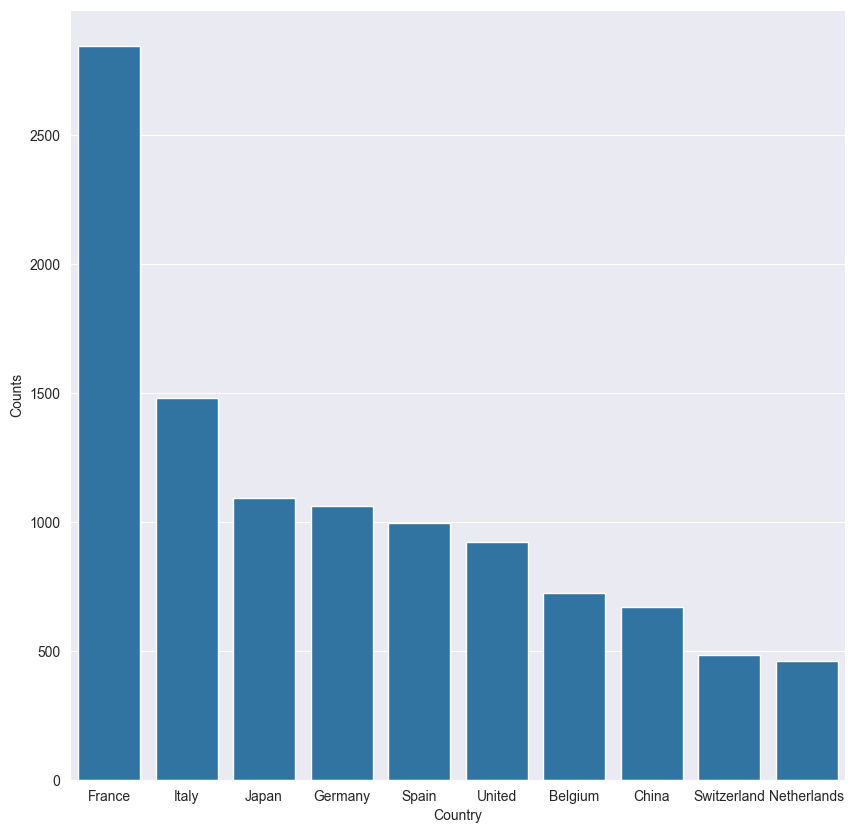

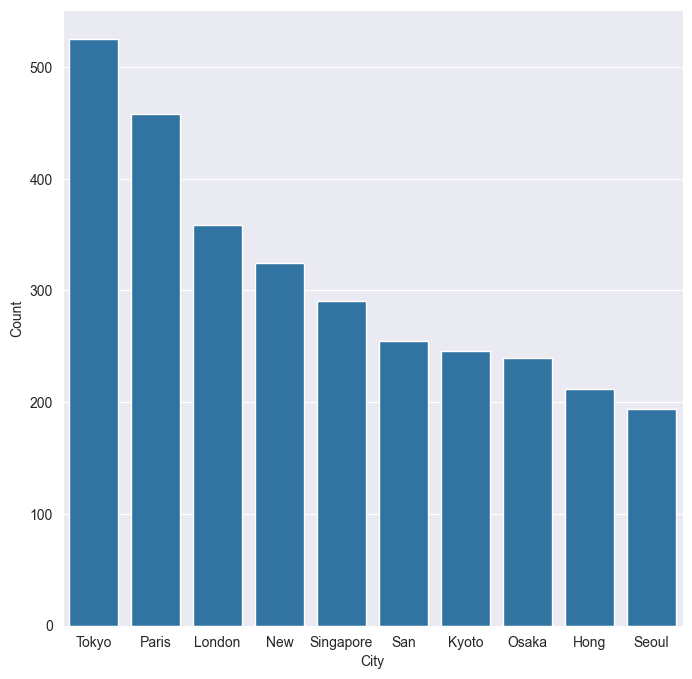

In [95]:
plt.figure(figsize=(10,10))
sns.barplot(x=df_country.index,y=df_country.values)
plt.xlabel("Country")
plt.ylabel("Counts")
plt.show()

plt.figure(figsize=(8,8))
sns.barplot(x=df_city.index,y=df_city.values)
plt.xlabel("City")
plt.ylabel("Count")
plt.show()

In [96]:
df_city3star=(df[df["Award"] == "3 Stars"]["City"].value_counts()).head(10)
df_city2star=(df[df["Award"] == "2 Stars"]["City"].value_counts()).head(10)
df_city1star=(df[df["Award"] == "1 Star"]["City"].value_counts()).head(10)

df_country3star=(df[df["Award"] == "3 Stars"]["Country"].value_counts()).head(10)
df_country2star=(df[df["Award"] == "2 Stars"]["Country"].value_counts()).head(10)
df_country1star=(df[df["Award"] == "1 Star"]["Country"].value_counts()).head(10)

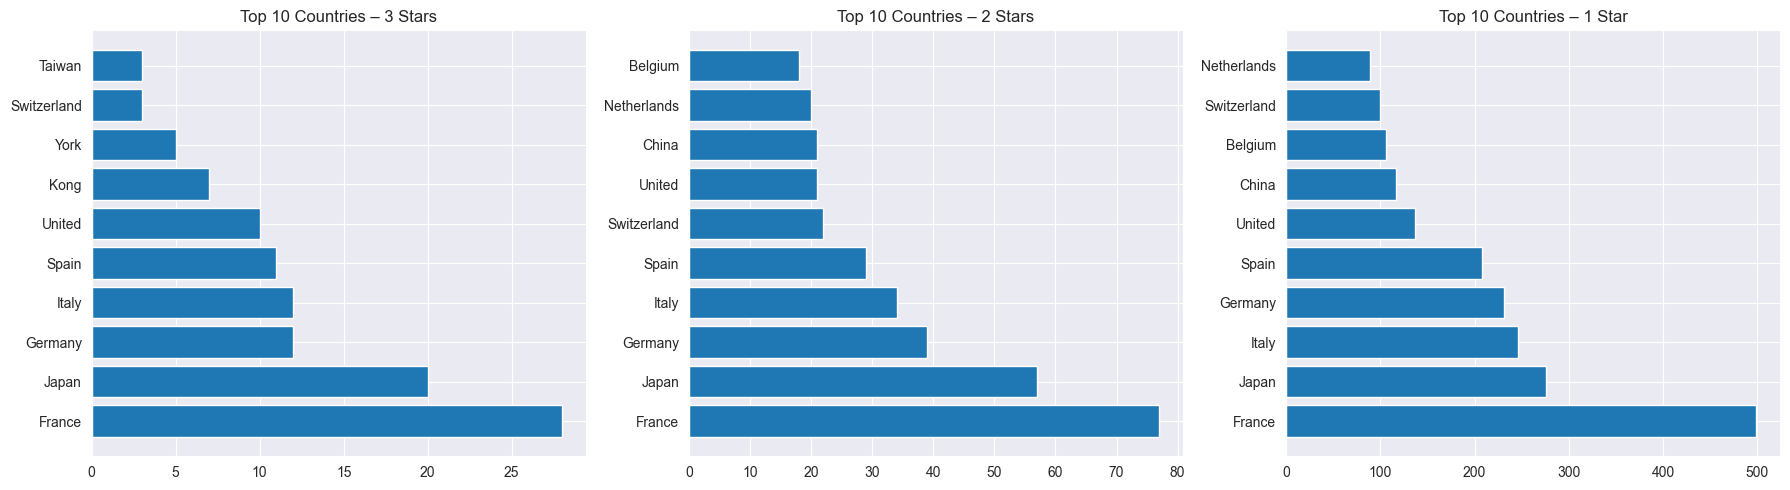

In [97]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.barh(df_country3star.index, df_country3star.values)
plt.title("Top 10 Countries – 3 Stars")

plt.subplot(1, 3, 2)
plt.barh(df_country2star.index, df_country2star.values)
plt.title("Top 10 Countries – 2 Stars")

plt.subplot(1, 3, 3)
plt.barh(df_country1star.index, df_country1star.values)
plt.title("Top 10 Countries – 1 Star")

plt.tight_layout()
plt.show()

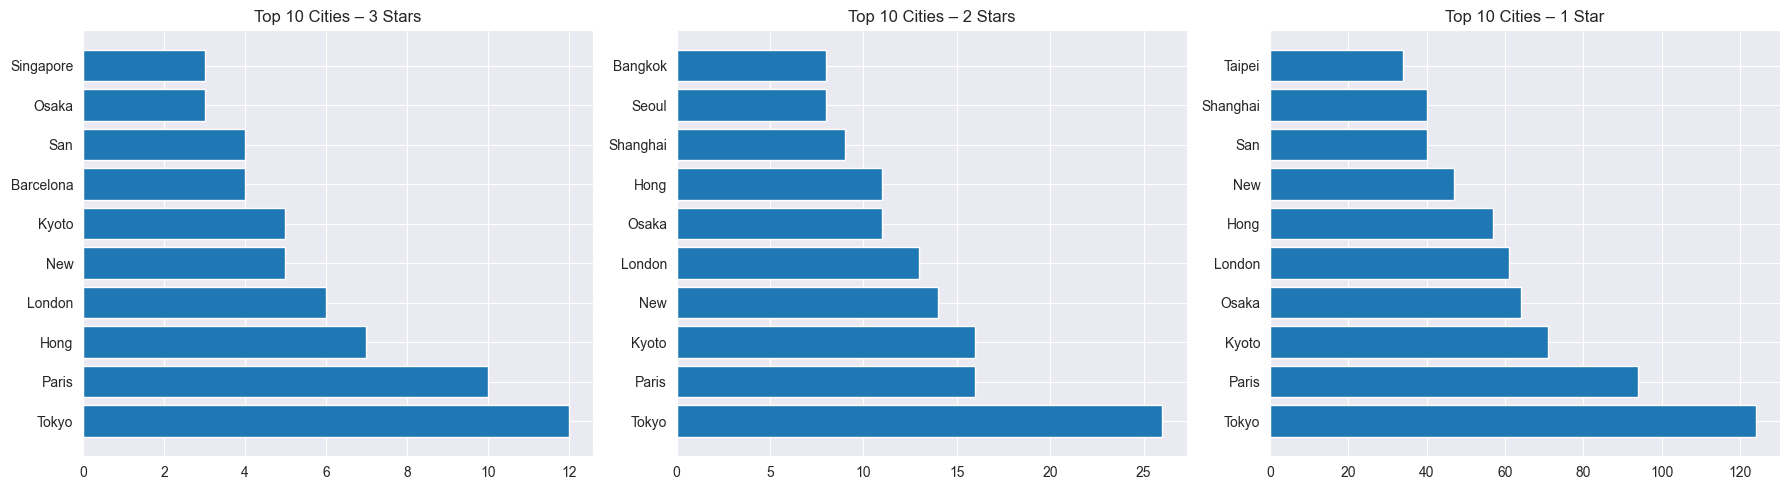

In [98]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.barh(df_city3star.index, df_city3star.values)
plt.title("Top 10 Cities – 3 Stars")

plt.subplot(1, 3, 2)
plt.barh(df_city2star.index, df_city2star.values)
plt.title("Top 10 Cities – 2 Stars")

plt.subplot(1, 3, 3)
plt.barh(df_city1star.index, df_city1star.values)
plt.title("Top 10 Cities – 1 Star")

plt.tight_layout()
plt.show()

In [99]:
df_cuisine=df["Cuisine"].value_counts().head(10)
df_cuisine

Modern Cuisine         2779
Traditional Cuisine     705
Creative                572
Japanese                562
Contemporary            531
Italian                 428
French                  387
Seafood                 339
Modern British          304
Street Food             270
Name: Cuisine, dtype: int64

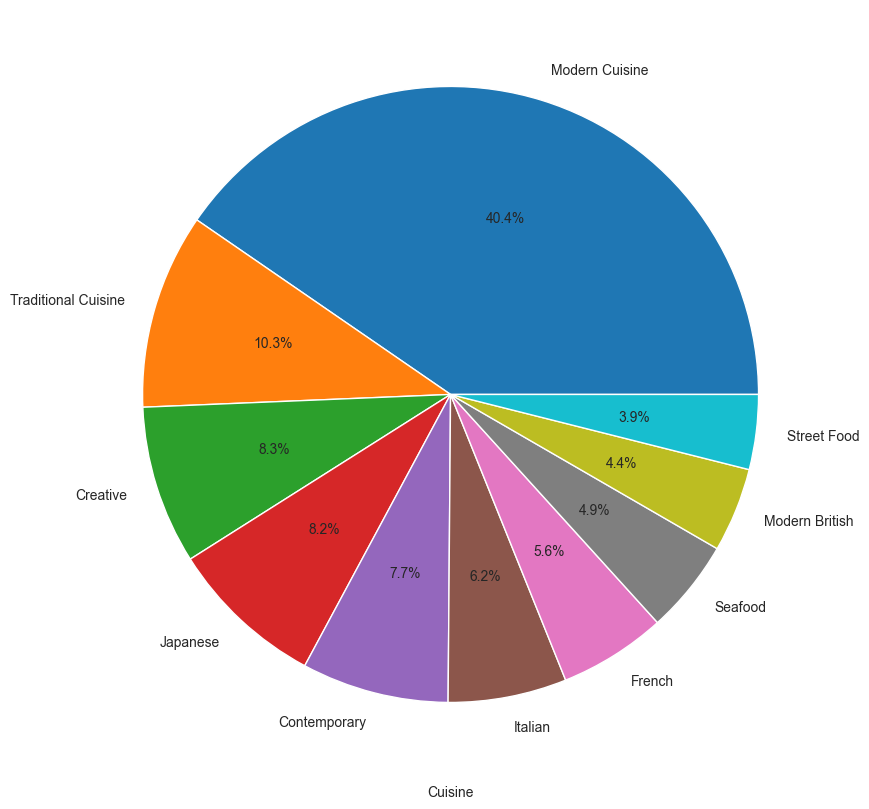

In [100]:
plt.figure(figsize=(10,10))
plt.pie(df_cuisine.values,labels=df_cuisine.index,autopct="%1.1f%%")
plt.xlabel("Cuisine")
plt.show()